<a href="https://colab.research.google.com/github/Tyagi-S/Image_Colorization/blob/master/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install -q keras

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import keras 
from keras.models import Sequential
from keras.layers import Dense, UpSampling2D, BatchNormalization, Activation, Flatten, Conv2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import plot_model
from keras.optimizers import Adam
import numpy as np

X = np.load('drive/My Drive/app/X.npy')

y = np.load('drive/My Drive/app/y.npy')

model = Sequential(name= 'colorizer')


#conv1
model.add(Conv2D(64,(3,3), input_shape=(128,128,1), strides=2, padding='same', use_bias=True, name='L1Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(64, (3,3), strides=1, padding='same', use_bias=True, name='L1Conv2'))
model.add(BatchNormalization())
model.add(Activation("relu"))


#conv2
model.add(Conv2D(128, (3,3), strides=2, padding='same', use_bias=True, name='L2Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(128, (3,3), strides=1, padding='same', use_bias=True, name='L2Conv2'))
model.add(BatchNormalization())
model.add(Activation("relu"))

          
#conv3
model.add(Conv2D(256, (3,3), strides=2, padding='same', use_bias=True, name='L3Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L3Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L3Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))

          
#conv4
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L4Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L4Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L4Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))


#conv5
model.add(Conv2D(512, (3,3), dilation_rate=2, strides=1, padding='same', use_bias=True, name='L5Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), dilation_rate=2, strides=1, padding='same', use_bias=True, name='L5Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), dilation_rate=2,  strides=1, padding='same', use_bias=True, name='L5Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))


#conv6
model.add(Conv2DTranspose(256, (4,4), strides=2, padding='same', use_bias=True, name='L8ConvTr1'))
model.add(Activation("relu"))

model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L8Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L8Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))

          
#conv7
model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same', use_bias=True, name='L9ConvTr1'))
model.add(Activation("relu"))

model.add(Conv2D(128, (3,3), strides=1, padding='same', use_bias=True, name='L9Conv2'))
model.add(BatchNormalization())
model.add(Activation("relu"))


#conv8
model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same', use_bias=True, name='L10ConvTr1'))
model.add(Activation("relu"))
model.add(Conv2D(128, (3,3), dilation_rate=1, strides=1, padding='same', use_bias=True, name='L10Conv2'))

model.add(BatchNormalization())
#model.add(Activation(LeakyReLU(alpha=0.2)))
model.add(LeakyReLU(alpha=0.2))
 
          
model.add(Conv2D(2,(1,1), strides=1, padding='same', dilation_rate=1, use_bias=True, name='OutputLayer'))

model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

Using TensorFlow backend.


In [5]:
model.summary()

Model: "colorizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1Conv1 (Conv2D)             (None, 64, 64, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
L1Conv2 (Conv2D)             (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
L2Conv1 (Conv2D)             (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 128)       0 

In [0]:
model.fit(X, y, epochs=50, batch_size=16)



Epoch 1/50
9293/9293 [==============================] - 289s 31ms/step - loss: 169.0272 - acc: 0.5395
Epoch 2/50
9293/9293 [==============================] - 274s 29ms/step - loss: 167.3496 - acc: 0.5408
Epoch 3/50
9293/9293 [==============================] - 274s 29ms/step - loss: 166.7560 - acc: 0.5429
Epoch 4/50
9293/9293 [==============================] - 274s 29ms/step - loss: 165.4580 - acc: 0.5498
Epoch 5/50
9293/9293 [==============================] - 273s 29ms/step - loss: 163.9967 - acc: 0.5550
Epoch 6/50
9293/9293 [==============================] - 273s 29ms/step - loss: 163.1017 - acc: 0.5582
Epoch 7/50
9293/9293 [==============================] - 273s 29ms/step - loss: 162.0991 - acc: 0.5593
Epoch 8/50
9293/9293 [==============================] - 273s 29ms/step - loss: 161.2994 - acc: 0.5637
Epoch 9/50
9293/9293 [==============================] - 273s 29ms/step - loss: 160.8858 - acc: 0.5632
Epoch 10/50
9293/9293 [==============================] - 273s 29ms/step - loss: 

In [6]:
from keras.models import load_model
model = load_model('drive/My Drive/app/fifty_epochs.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


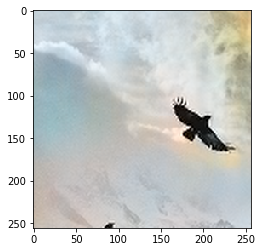

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import cv2


def separate_channel(img_rgb):
    img_lab = skimage.color.rgb2lab(img_rgb)
    l, a, b = cv2.split(img_lab)
    return l,a,b

img = skimage.io.imread('drive/My Drive/app/Test/641kuT.jpg')
img = cv2.resize(img, (128,128), interpolation= cv2.INTER_LANCZOS4)

l1,_,_ = separate_channel(img)



pred = model.predict(l1.reshape(1,128,128,1))


arr = np.zeros((1,128,128,3))
for hei in range(len(pred[0])):
    for wid in range(len(pred[0][0])):
        arr[0][hei][wid] = np.array([l1[hei][wid], pred[0][hei][wid][0], pred[0][hei][wid][1]])



img_rgb = skimage.color.lab2rgb(arr[0])
img_rgb = cv2.resize(img_rgb, (256,256), interpolation= cv2.INTER_LANCZOS4)

plt.imshow(img_rgb)

